In [23]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np

import sys
sys.path.append('../qubo')

In [24]:
pmin = 0
pmax = 116
numDelaysList = range(0, 200)
maxDelay = 18
totaldelays = {}
for partition in range(pmin, pmax + 1):
    resultfile = '../data/results/atm_instance_partition%04i.results.h5' % partition
    td = []
    nd = []
    f = h5py.File(resultfile, 'r')
    for numDelays in numDelaysList:
        groupname = "solution_constraint_programming_numDelays%03i_maxDelay%03i" % (numDelays, maxDelay)
        if groupname in f:
            g = f[groupname]
            if 'total delay' in g.attrs.keys():
                td.append(g.attrs['total delay'])
                nd.append(numDelays)
    f.close()
    if not all(np.array(td) == 0):
        totaldelays[partition] = (nd, td)
            

In [25]:
%matplotlib inline

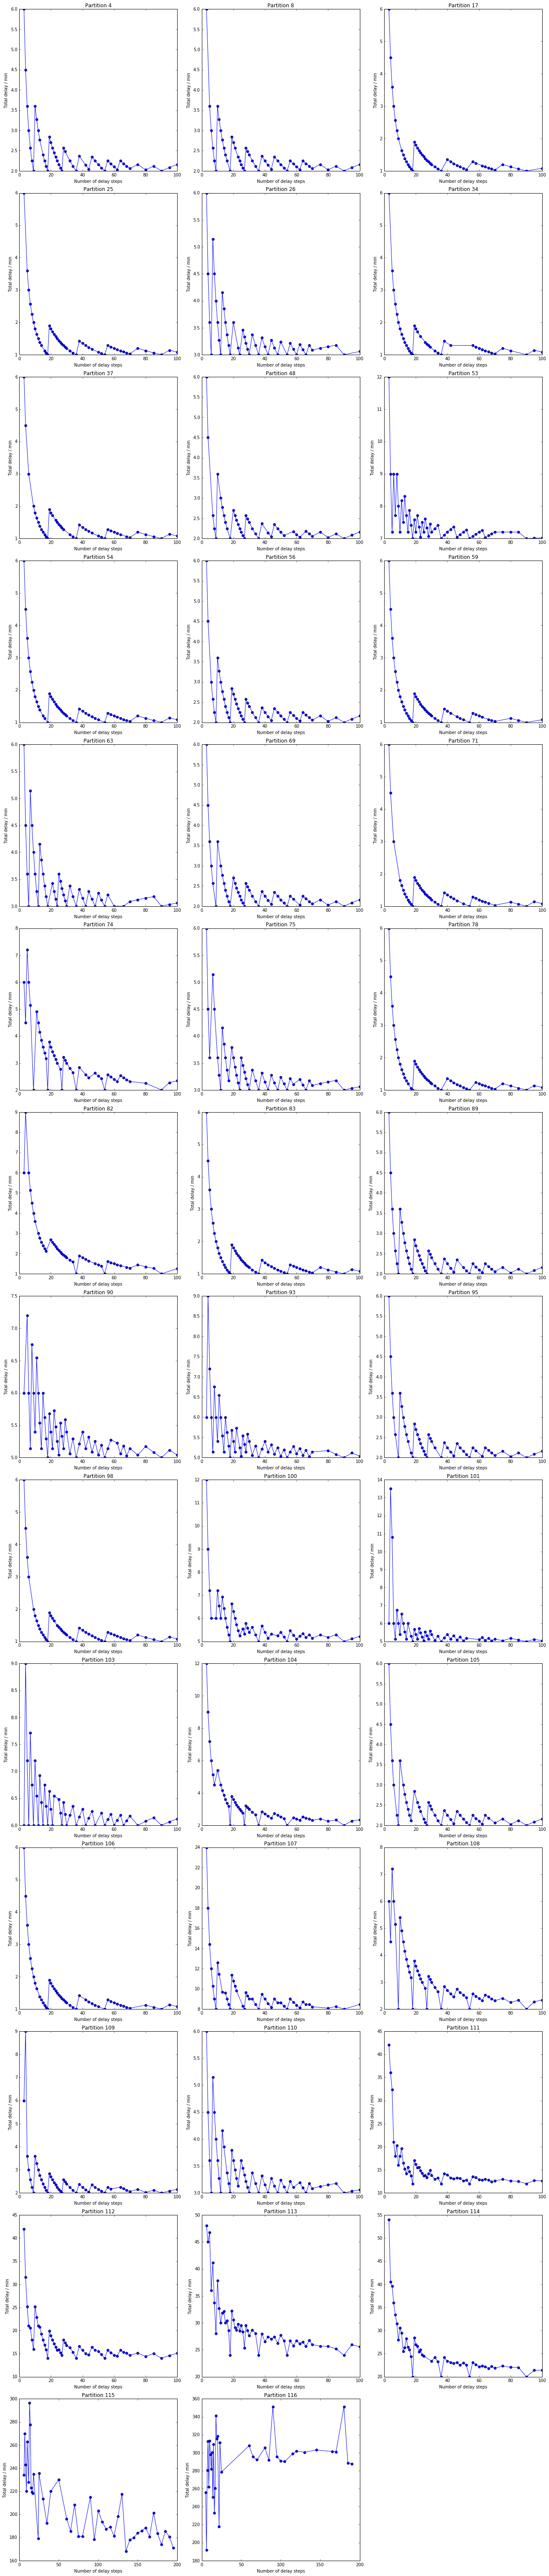

In [28]:
ncol = 3
Np = len(totaldelays.keys())
nrow = Np / ncol + (Np % ncol != 0)
fig = plt.figure(figsize=(6 * ncol, 6 * nrow))
n = 0
for partition in totaldelays.keys():
    ax = fig.add_subplot(nrow, ncol, n + 1)
    ax.plot(totaldelays[partition][0], totaldelays[partition][1], 'o-')
    ax.set_title("Partition %i" % partition)
    #ax.set_xlim(0, 100)
    ax.set_xlabel('Number of delay steps')
    ax.set_ylabel('Total delay / min')

    n = n + 1
plt.tight_layout()


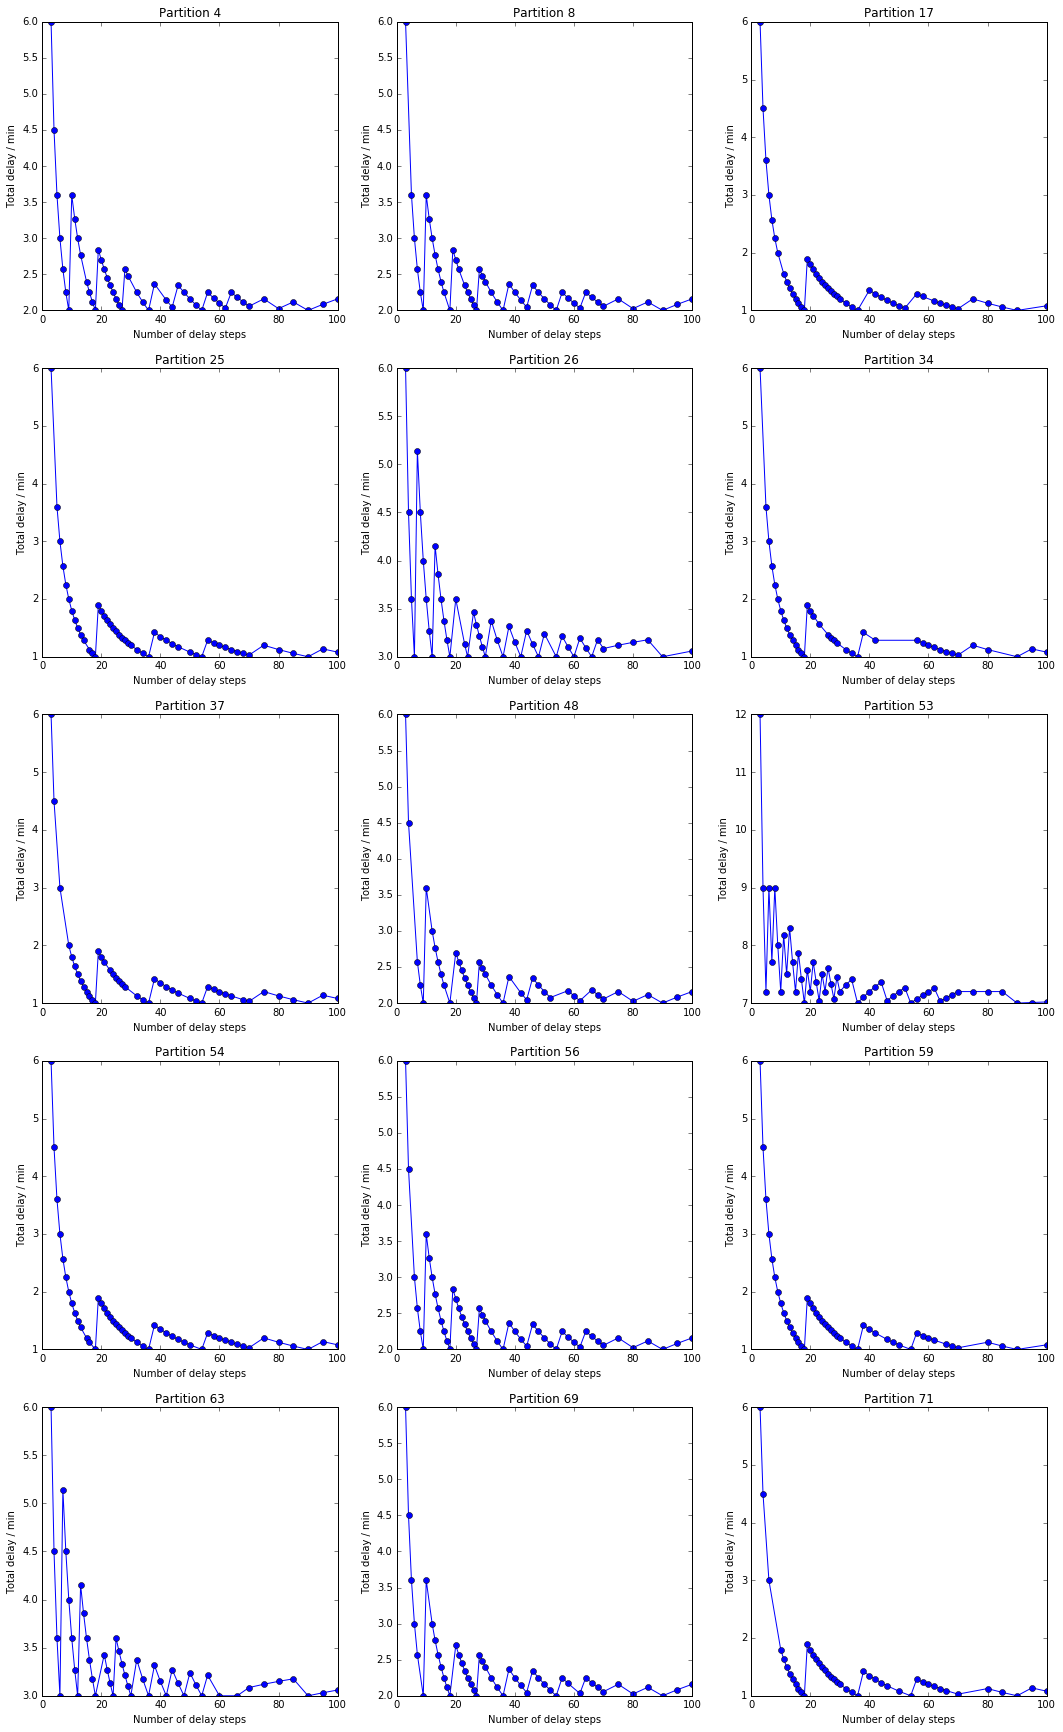

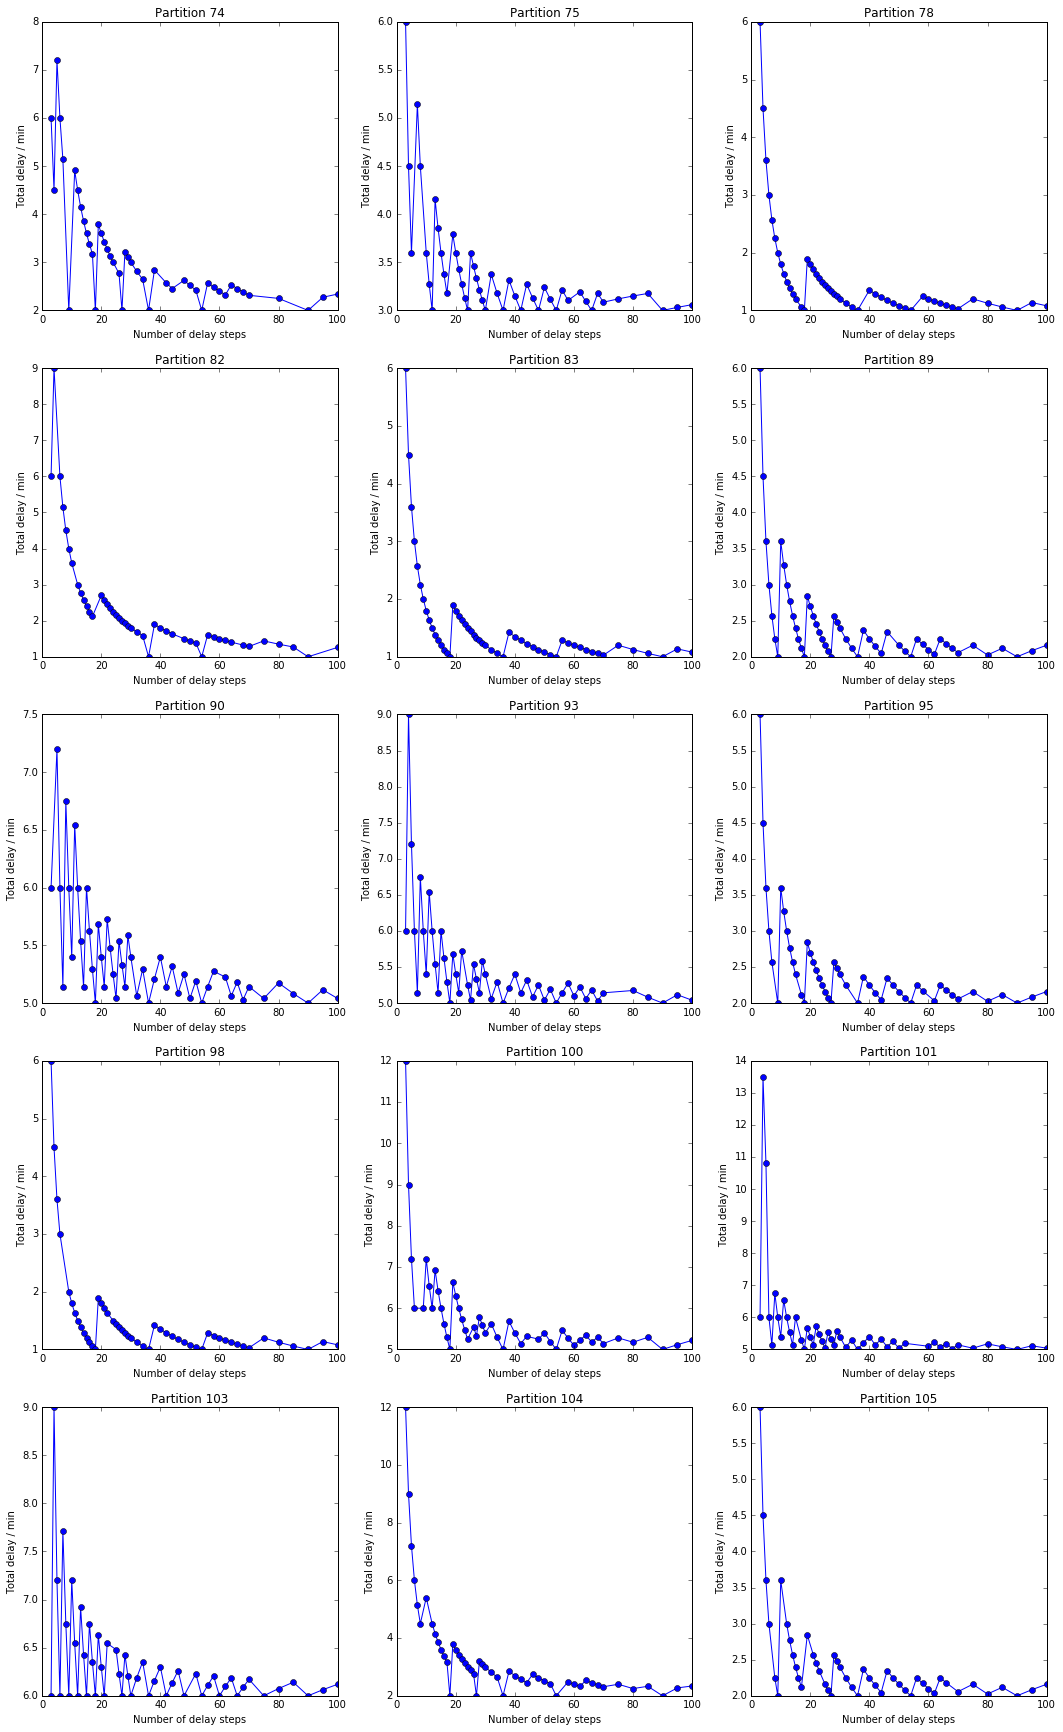

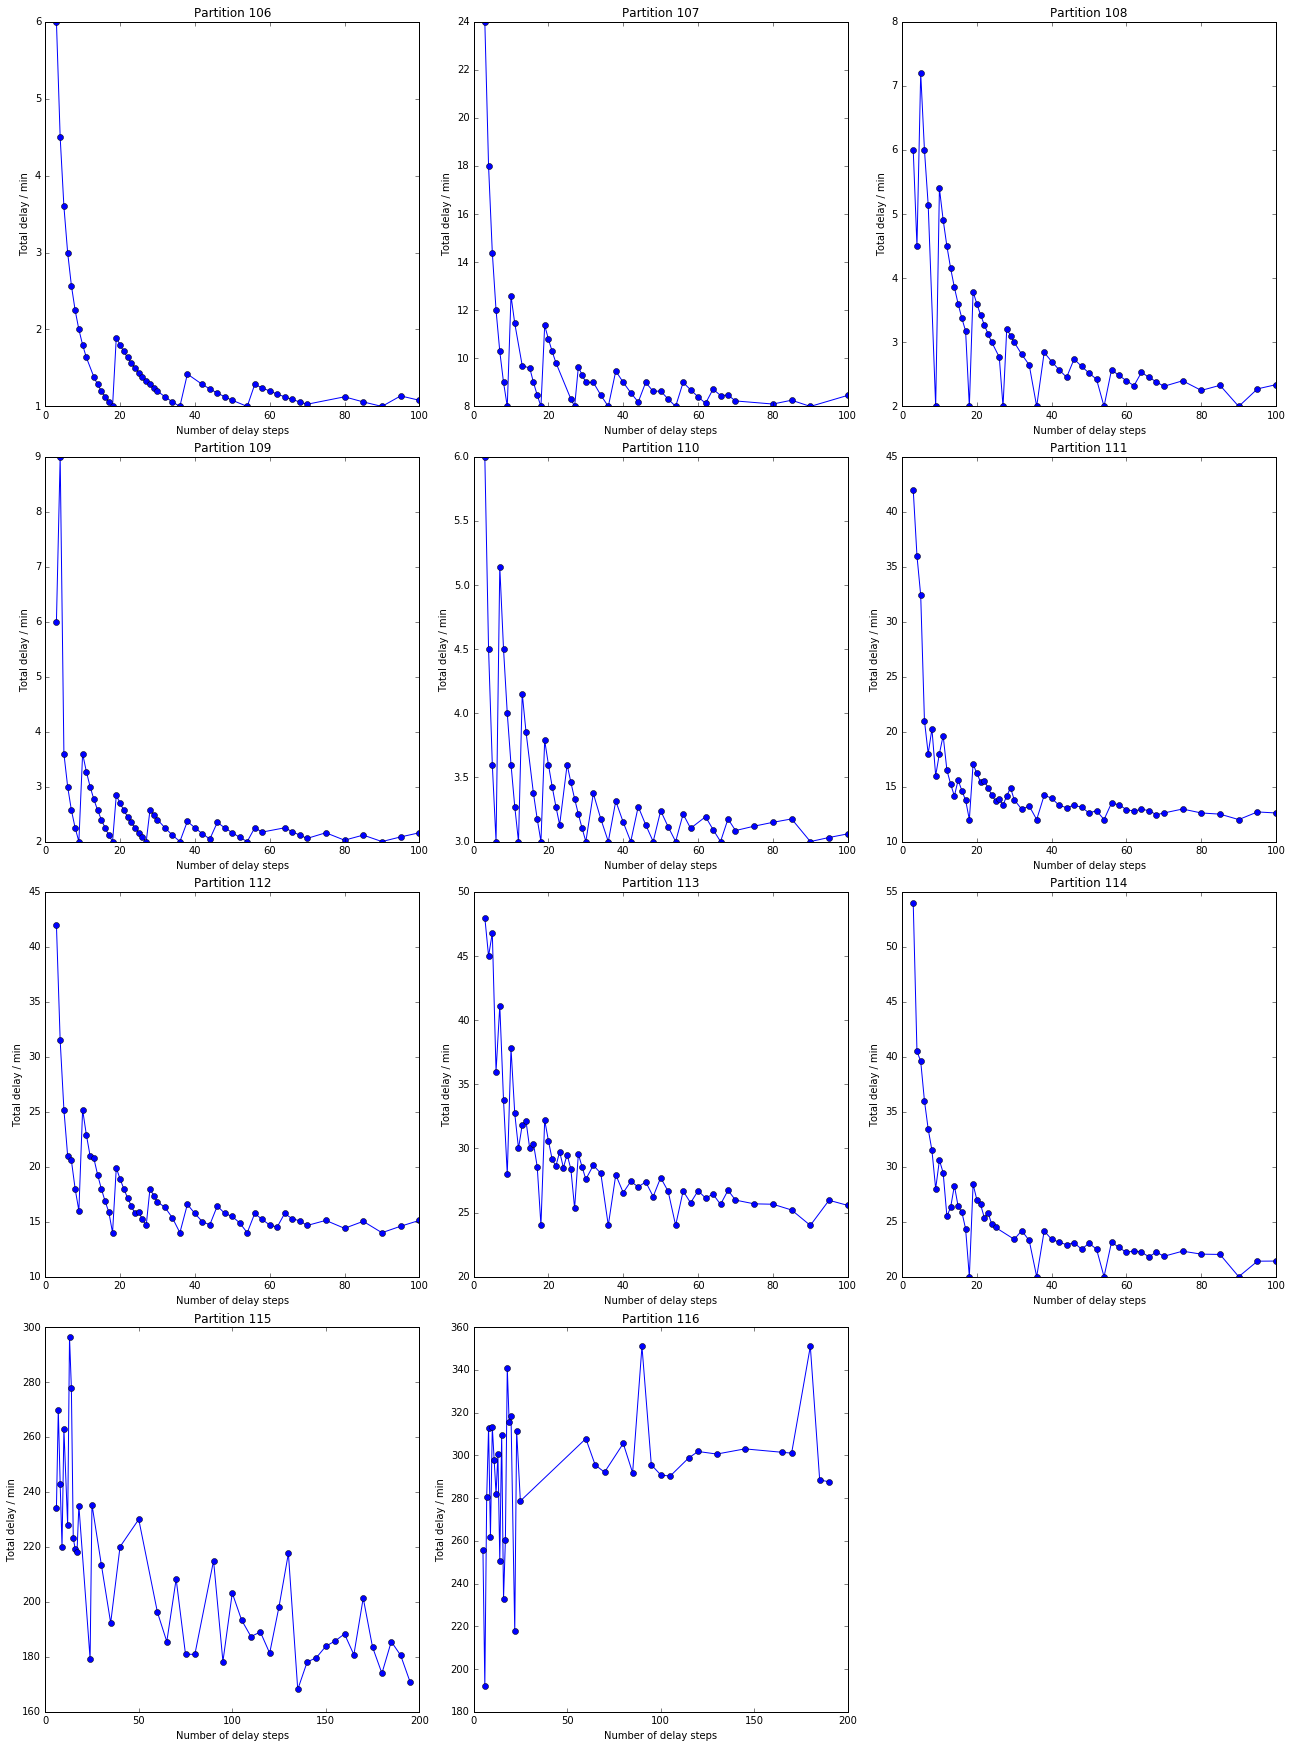

In [27]:
nperpage = 5

ncol = 3
Np = len(totaldelays.keys())
nrow = Np / ncol + (Np % ncol != 0)
pdf = matplotlib.backends.backend_pdf.PdfPages('totalDelayVsNumDelay.pdf');
n = 0
for partition in totaldelays.keys():
    if n % (ncol * nperpage) == 0:
        fig = plt.figure(figsize=(6 * ncol, 6 * nperpage));

    ax = fig.add_subplot(nperpage, ncol, n % (ncol * nperpage) + 1)
    ax.plot(totaldelays[partition][0], totaldelays[partition][1], 'o-')
    ax.set_title("Partition %i" % partition)
    #ax.set_xlim(0, 100)
    ax.set_xlabel('Number of delay steps')
    ax.set_ylabel('Total delay / min')
    
    if n % (ncol * nperpage) == ncol * nperpage - 1:
        pdf.savefig(figure=fig);
    n = n + 1
pdf.savefig(figure=fig);


pdf.close();

plt.tight_layout()